In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/assis-estud-agregado-media-clean2.csv', delimiter=';')
df

,X,Y1,Y2
0,87994,1,540.000000
1,87995,1,909.683333
2,87996,1,471.333333
3,87997,1,350.005000
4,88002,1,910.873333
5,88006,0,850.000000
6,88009,1,406.666667
7,88010,1,477.000000
8,88013,0,966.666667
9,88015,1,200.000000


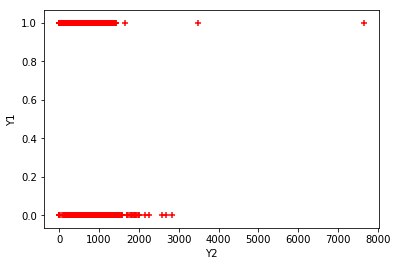

In [6]:
%matplotlib inline
plt.xlabel('Y2')
plt.ylabel('Y1')
plt.scatter(df.Y2,df.Y1,color='red',marker='+')


In [7]:
area = df[['Y2']]
area

,Y2
0,540.000000
1,909.683333
2,471.333333
3,350.005000
4,910.873333
5,850.000000
6,406.666667
7,477.000000
8,966.666667
9,200.000000


In [10]:
price = df.Y1
price

0       1
1       1
2       1
3       1
4       1
5       0
6       1
7       1
8       0
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      0
24      1
25      0
26      0
27      1
28      1
29      0
       ..
1822    1
1823    1
1824    0
1825    0
1826    1
1827    1
1828    1
1829    1
1830    0
1831    1
1832    1
1833    1
1834    0
1835    0
1836    0
1837    0
1838    1
1839    1
1840    1
1841    1
1842    1
1843    1
1844    1
1845    1
1846    1
1847    1
1848    1
1849    1
1850    1
1851    1
Name: Y1, Length: 1852, dtype: int64

In [11]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(area,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
reg.predict([[500]])

array([0.82705287])

In [13]:
reg.coef_

array([-0.00011397])

In [14]:
reg.intercept_

0.8840381964456783

**Y = m * X + b (m is coefficient and b is intercept)**

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [15]:
area_df = pd.read_csv("datasets/obs-catalisador.csv")
area_df

,X
0,0
1,200
2,400
3,600
4,800
5,1000


In [16]:
p = reg.predict(area_df)
p

array([0.8840382 , 0.86124406, 0.83844993, 0.8156558 , 0.79286167,
       0.77006754])

In [17]:
from sklearn.metrics import mean_squared_error

area_df['prices']=p
area_df


print('Erro Médio Quadrático: %f' % mean_squared_error(df.Y1, area_df.prices))

ValueError: Found input variables with inconsistent numbers of samples: [1852, 6]

In [ ]:
#area_df.to_csv("obs-pred-catalisador.csv")
df

df = pd.read_csv('datasets/assis-estud-agregado-media-clean2.csv', delimiter=';')

In [ ]:
%matplotlib inline
plt.xlabel('Y2', fontsize=20)
plt.ylabel('Y1', fontsize=20)
plt.scatter(df.Y2,df.Y1,color='red',marker='+')
plt.plot(df.Y2,reg.predict(area),color='blue')

In [ ]:
price

<h3>Abordagem Pymc</h3>

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

In [18]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
palette = 'muted'
sns.set_palette(palette); sns.set_color_codes(palette)
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

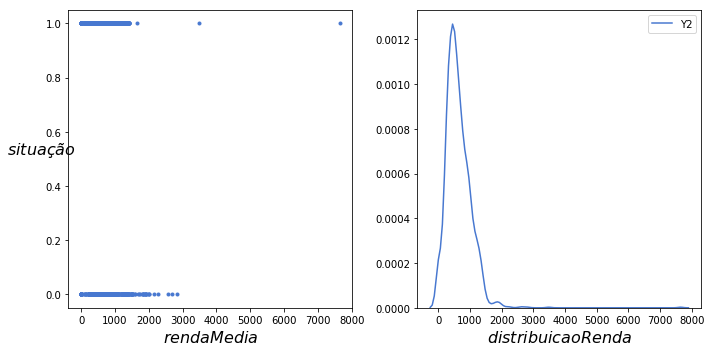

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(area, price, 'b.')
plt.xlabel('$rendaMedia$', fontsize=16)
plt.ylabel('$situação$', fontsize=16, rotation=0)
#plt.plot(area, price, 'k')
plt.subplot(1,2,2)
sns.kdeplot(df.Y2)
plt.xlabel('$distribuicaoRenda$', fontsize=16)
plt.tight_layout()
plt.savefig('B04958_04_02.png', dpi=300, figsize=(5.5, 5.5))
x = df.Y2
y = df.Y1


In [22]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)

    mu = pm.Deterministic('mu', alpha + beta * x)
    #y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    y_pred = pm.Normal('y_pred', mu=mu,  observed=y)
    
    start = pm.find_MAP() 
    step = pm.Metropolis() 
    trace = pm.sample(10000, step, start)

/media/wesleyz/HD1Tera/anacond3/envs/bayes/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1,848.1, ||grad|| = 0.17196: 100%|██████████| 37/37 [00:00<00:00, 3098.27it/s]   
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:07<00:00, 5949.70draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [ ]:
pm.traceplot(trace)
plt.savefig('B04958_04_03.png', dpi=300, figsize=(5.5, 5.5))

In [ ]:
pm.summary(trace)


In [ ]:
varnames = ['alpha', 'beta', 'epsilon']
pm.autocorrplot(trace, varnames)
plt.savefig('B04958_04_04.png', dpi=300, figsize=(5.5, 5.5));

In [ ]:
pm.autocorrplot(trace, varnames);

In [ ]:
ppc = pm.sample_ppc(trace, samples=231, model=model_n)

In [ ]:
# predicted data
for y_tilde in ppc['y_pred']:
    sns.kdeplot(y_tilde, alpha=0.1, c='gray')
# actual data
sns.kdeplot(y, linewidth=3, color='k')
plt.xlabel('$y$', fontsize=16);

In [ ]:
plt.plot(x, y, 'b.');
alpha_m = trace_n['alpha'].mean()
beta_m = trace_n['beta'].mean()
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)
plt.savefig('B04958_04_06.png', dpi=300, figsize=(5.5, 5.5));

In [ ]:
with pm.Model() as model_n:
    alpha = pm.Normal('alpha', mu=0.31, sd=7)
    beta = pm.Normal('beta', mu=0.34, sd=6)
    epsilon = pm.HalfCauchy('epsilon', 4.45)
    
    #x = np.random.normal(3.39, 4.53, N)
    
    mu = alpha + beta * x
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)

    rb = pm.Deterministic('rb', (beta * x.std() / y.std()) ** 2)

    y_mean = y.mean()
    ss_reg = pm.math.sum((mu - y_mean) ** 2)
    ss_tot = pm.math.sum((y - y_mean) ** 2)
    rss = pm.Deterministic('rss', ss_reg/ss_tot)

    start = pm.find_MAP()
    step = pm.NUTS()
    trace_n = pm.sample(2000, step=step, start=start)

In [ ]:
pm.summary(trace_n)

In [ ]:
pm.traceplot(trace_n)
plt.savefig('B04958_04_03.png', dpi=300, figsize=(5.5, 5.5))